In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

sns.set(context="paper", style="whitegrid", 
       rc={
           "figure.figsize": (21, 9),
           "figure.dpi": 100
       })
google = ["#4285F4", "#DB4437", "#F4B400", "#0F9D58"]
sns.set_palette(google)

In [2]:
df = pd.read_csv("./data/raw_appliances/main_1.csv")
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

df.index = df["TIMESTAMP"]

In [3]:
df.head()

,TIMESTAMP,power factor_apparent,power_reactive,power_active,power_apparent,appliances_type,appliances_id,appliances_name
TIMESTAMP,,,,,,,,
2012-04-01 00:00:00,2012-04-01 00:00:00,0.93,141.0,918.0,1066.0,main,1,main 1
2012-04-01 00:01:00,2012-04-01 00:01:00,0.93,141.0,913.0,1056.0,main,1,main 1
2012-04-01 00:02:00,2012-04-01 00:02:00,0.93,139.0,872.0,1021.0,main,1,main 1
2012-04-01 00:03:00,2012-04-01 00:03:00,0.93,141.0,872.0,1018.0,main,1,main 1
2012-04-01 00:04:00,2012-04-01 00:04:00,0.89,140.0,772.0,1018.0,main,1,main 1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1051200 entries, 2012-04-01 00:00:00 to 2014-03-31 23:59:00
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   TIMESTAMP              1051200 non-null  datetime64[ns]
 1   power factor_apparent  1051200 non-null  float64       
 2   power_reactive         1051200 non-null  float64       
 3   power_active           1051200 non-null  float64       
 4   power_apparent         1051200 non-null  float64       
 5   appliances_type        1051200 non-null  object        
 6   appliances_id          1051200 non-null  int64         
 7   appliances_name        1051200 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 72.2+ MB


In [5]:
resample_min = 5
df2 = df.resample(f"{resample_min}min").mean()
df2 = df2.reset_index()

In [6]:
df2.head()

,TIMESTAMP,power factor_apparent,power_reactive,power_active,power_apparent,appliances_id
0,2012-04-01 00:00:00,0.922,140.4,869.4,1035.8,1
1,2012-04-01 00:05:00,0.924,181.2,1030.4,1229.0,1
2,2012-04-01 00:10:00,0.946,304.8,1684.0,1862.8,1
3,2012-04-01 00:15:00,0.972,497.4,2838.2,3035.8,1
4,2012-04-01 00:20:00,0.976,430.0,2656.4,2922.8,1


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   TIMESTAMP              210240 non-null  datetime64[ns]
 1   power factor_apparent  210240 non-null  float64       
 2   power_reactive         210240 non-null  float64       
 3   power_active           210240 non-null  float64       
 4   power_apparent         210240 non-null  float64       
 5   appliances_id          210240 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 9.6 MB


#### number of day in dataset

In [8]:
len(df2)/(24*60/resample_min)

730.0

In [9]:
len(df2)/(24*60/resample_min) / 7

104.28571428571429

## EDA

### Daily Power Consumption

In [10]:
# number of sample per one day
oneday_n = int(24*60/resample_min)
# number of sample per week
oneweek_n = int(oneday_n * 7)

oneday_n, oneweek_n

(288, 2016)

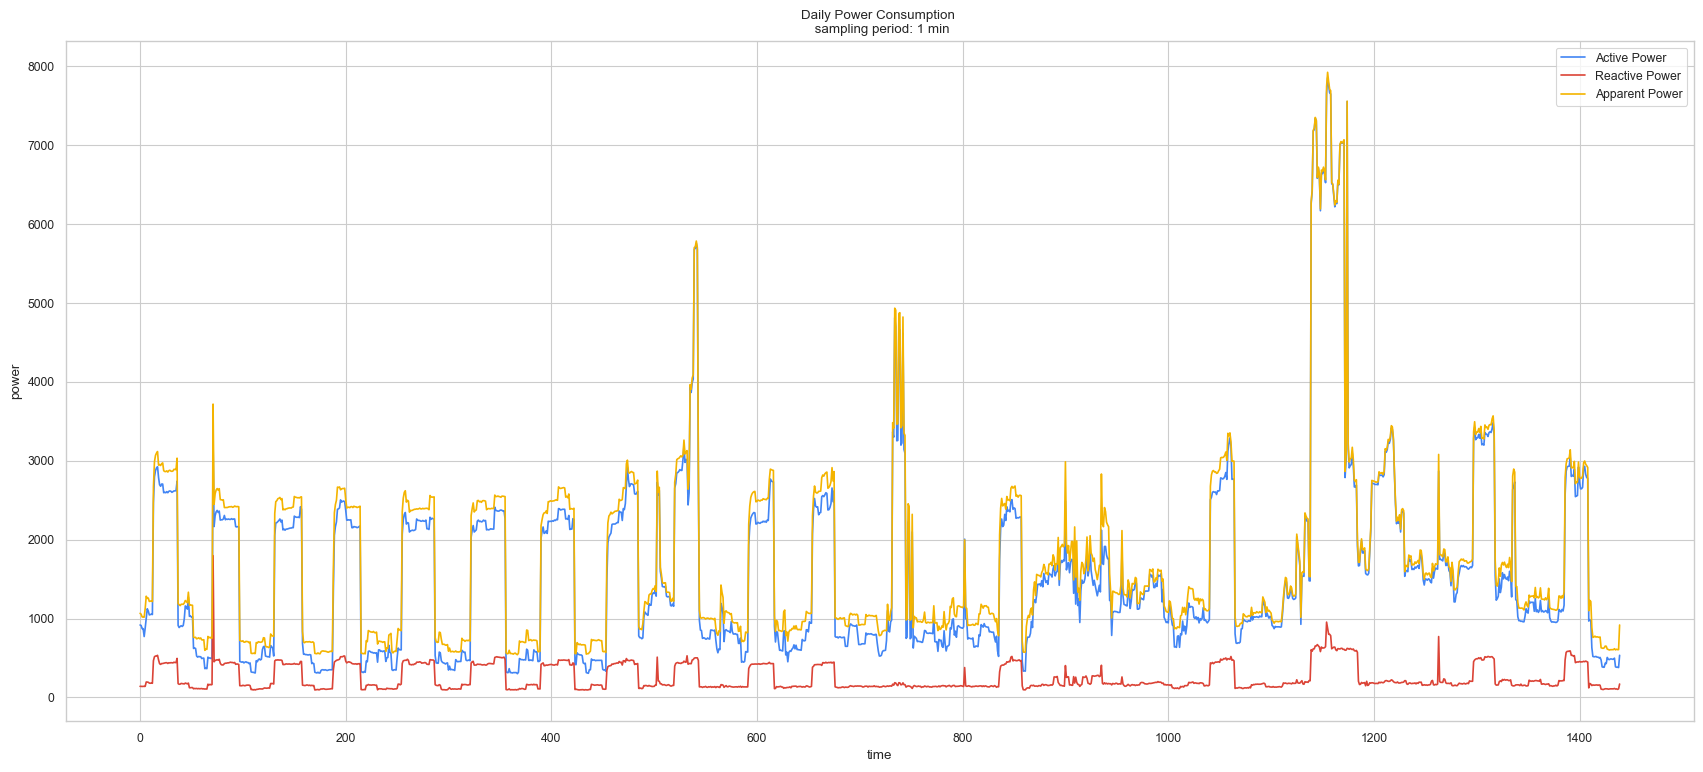

In [11]:
x = np.arange(0, 24*60)

sns.lineplot(x, df['power_active'][:24*60], label="Active Power")
sns.lineplot(x, df['power_reactive'][:24*60], label="Reactive Power")
sns.lineplot(x, df['power_apparent'][:24*60], label="Apparent Power")

plt.title(f'Daily Power Consumption \n sampling period: 1 min')
plt.xlabel("time")
plt.ylabel("power")

plt.savefig(f"./visualization_output/02_daily_power_consump.png", dpi=150)

plt.show()

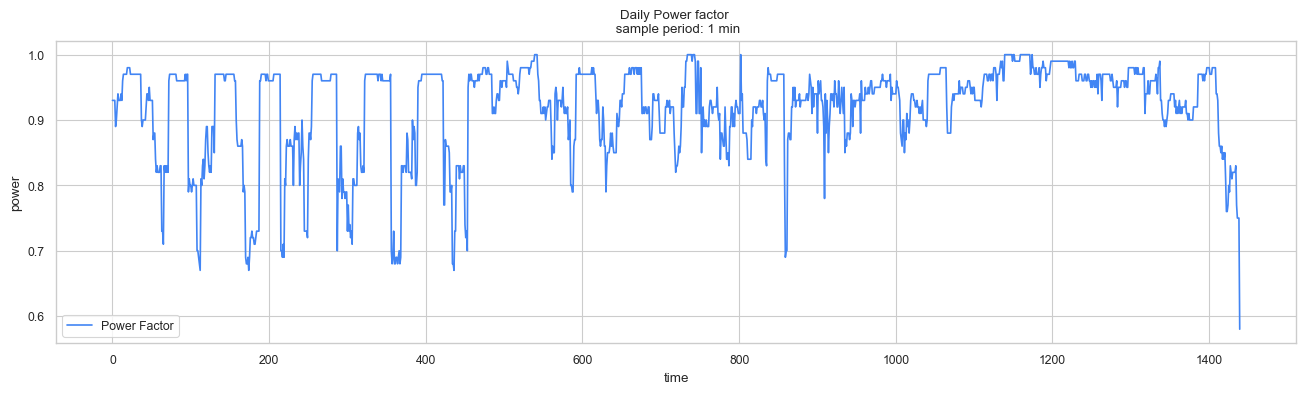

In [12]:
x = np.arange(0, 24*60)

fig = plt.figure(figsize=(16, 4))

sns.lineplot(x, df['power factor_apparent'][: 24*60], label="Power Factor")

plt.title(f'Daily Power factor \n sample period: 1 min')
plt.xlabel("time")
plt.ylabel("power")

plt.show()

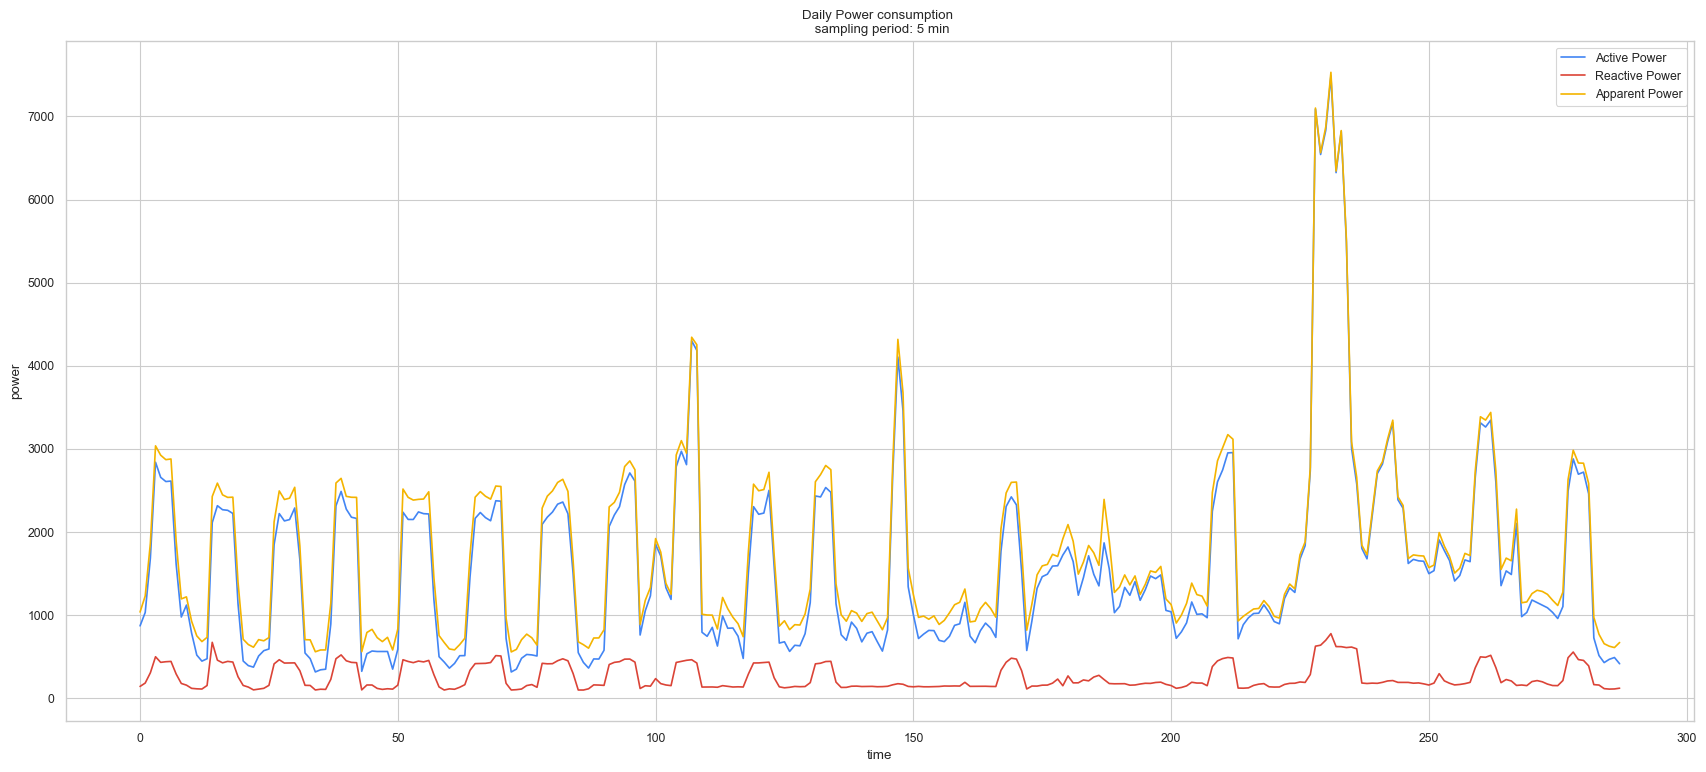

In [13]:
x = np.arange(0, oneday_n)

sns.lineplot(x, df2['power_active'][: oneday_n], label="Active Power")
sns.lineplot(x, df2['power_reactive'][: oneday_n], label="Reactive Power")
sns.lineplot(x, df2['power_apparent'][: oneday_n], label="Apparent Power")

plt.title(f'Daily Power consumption \n sampling period: {resample_min} min')
plt.xlabel("time")
plt.ylabel("power")

plt.show()

### Weekly Power Consumption

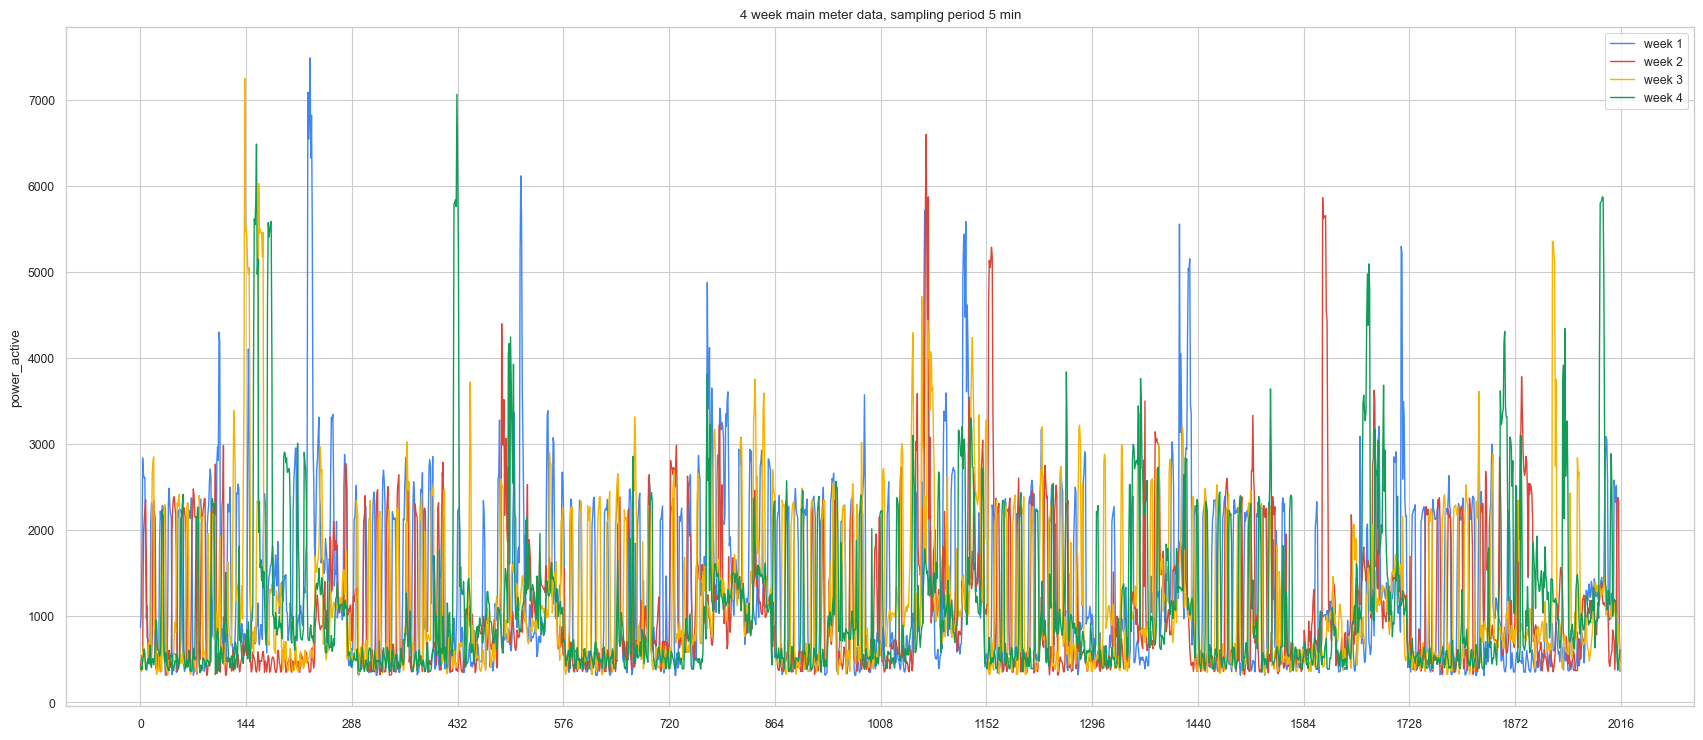

In [14]:
# time axis for one week
x = np.arange(0, oneweek_n)

n_week = 4
# plot one week data
for i in range(n_week):
    sns.lineplot(x, df2['power_active'][oneweek_n*i:oneweek_n*(i+1)], lw=1, label=f"week {i+1}")

# config x tick for every day
plt.xticks(np.arange(0, oneweek_n+oneday_n/2, oneday_n/2))

plt.title(f"{n_week} week main meter data, sampling period {resample_min} min")
plt.show()

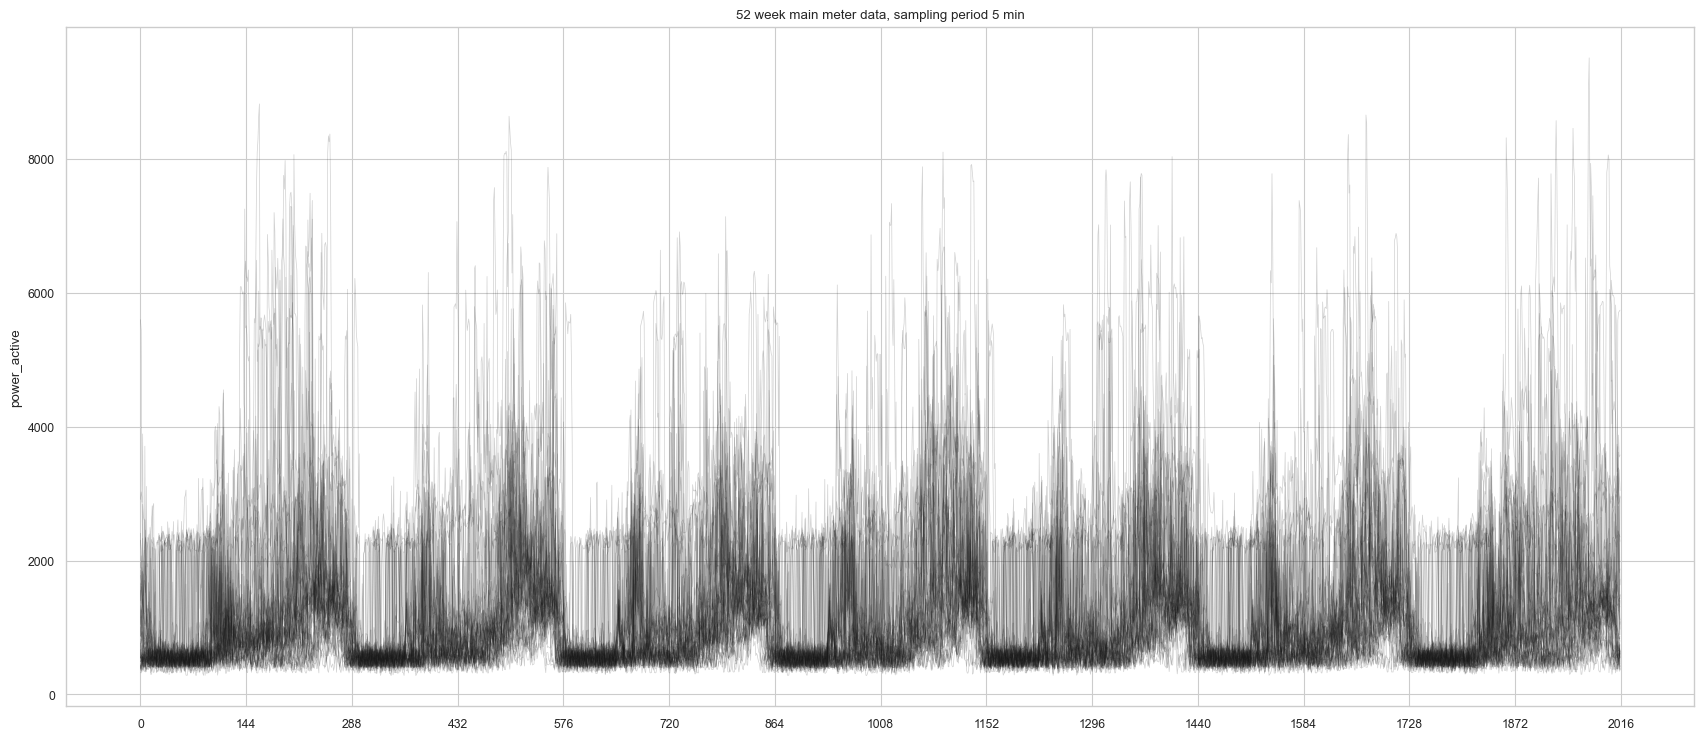

In [15]:
# time axis for one week
x = np.arange(0, oneweek_n)

n_week = 52
# plot one week data
for i in range(n_week):
    sns.lineplot(x, df2['power_active'][oneweek_n*i:oneweek_n*(i+1)], lw=0.5, alpha=0.2, color='k')

# config x tick for every day
plt.xticks(np.arange(0, oneweek_n+oneday_n/2, oneday_n/2))

plt.title(f"{n_week} week main meter data, sampling period {resample_min} min")
plt.savefig(f"./visualization_output/02_{n_week}week_main_meter.png", dpi=150)
plt.show()